# 🎭 **For Clustering (Grouping Similar Patients)**

**Goal:** Find natural groups of patients with similar health patterns.

**What to Look For:**hat to Look For:**
- ✅ **High "Mixed Results" percentages** (40-70%)- ✅ **High "Mixed Results" percentages** (40-70%)
- ✅ **Diverse outcome patterns** across the population
- ❌ **Avoid** combinations where most patients fall into the same category- ❌ **Avoid** combinations where most patients fall into the same category

**Why:** Clustering works best when patients have diverse health profiles to create meaningful groups.**Why:** Clustering works best when patients have diverse health profiles to create meaningful groups.

**Best Choices from Our Data:**
- HbA1c + Serum Creatinine (58.8% mixed results)
- HbA1c + TSH (58.6% mixed results)


# 🔗 **For Association Rule Mining (Finding Relationships)**

**Goal:** Discover relationships between different test results (e.g., "If Test A is abnormal, then Test B is likely abnormal too").

**What to Look For:**
- ✅ **Moderate "Both Tests Abnormal" percentages** (15-40%)
- ✅ **Balanced distribution** across all four categories
- ❌ **Avoid** combinations dominated by "Both Normal" (>80%)

**Why:** Association rules need sufficient co-occurrence of abnormal results to find meaningful patterns.

**Best Choices from Our Data:**
- HbA1c + Serum Creatinine (25.7% both abnormal)
- HbA1c + TSH (22.9% both abnormal)


In [5]:
import pandas as pd

df = pd.read_csv("../model_data_insight/cleaned_combined_dataset.csv", encoding='latin-1')
clustering_candidates = pd.read_csv("../model_data_insight/clustering_candidates.csv", encoding='latin-1')
df.head()


,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab,Age,Outcome
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab,64.0,n
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab,37.0,n
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab,53.0,n
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab,50.0,n
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab,42.0,n


In [2]:
# Removing unrealistic Ages and null values in Age
print(f"Original dataset size: {df.shape}")
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]
df = df.dropna(subset=['Age'])
print(f"Filtered dataset size: {df.shape}")

Original dataset size: (139842, 13)
Filtered dataset size: (139737, 13)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

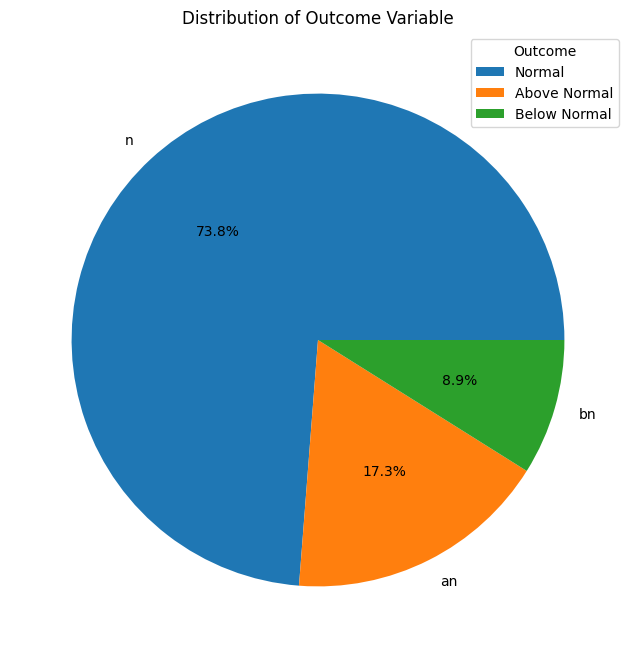

In [4]:
plt.figure(figsize=(8,8))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Outcome Variable')
plt.ylabel('')  # Remove the default ylabel for pie charts
plt.legend(title='Outcome', labels=['Normal', 'Above Normal', 'Below Normal'], loc='upper right')
plt.show()


In [6]:
clustering_candidates


,Test 1,Test 2,Total Patients,Test 1 Abnormal %,Test 2 Abnormal %,Both Tests Abnormal %,Both Tests Normal %,Mixed Results %,Both_Abnormal_Numeric,Both_Normal_Numeric,Mixed_Numeric,Test1_Abnormal_Numeric,Test2_Abnormal_Numeric,Diversity_Score
0,S.Iron,Vitamin D3,1635,0.0%,76.6%,0.0%,22.6%,77.4%,0.0,22.6,77.4,0.0,76.6,71.12
1,Vitamin D3,Complete Blood Count,1682,76.7%,0.0%,0.0%,22.6%,77.4%,0.0,22.6,77.4,76.7,0.0,71.10
2,Blood Urea Nitrogen,Serum Creatinine,2870,68.8%,36.1%,18.6%,18.6%,62.7%,18.6,18.6,62.7,68.8,36.1,71.08
3,HbA1c,Blood Glucose,1855,82.2%,0.0%,0.0%,21.4%,78.6%,0.0,21.4,78.6,82.2,0.0,70.72
4,TSH,Vitamin D3,2610,28.1%,72.2%,15.4%,21.3%,63.3%,15.4,21.3,63.3,28.1,72.2,69.16
5,Serum HDL Cholesterol,Serum LDL Cholesterol,1602,37.9%,68.7%,23.6%,19.0%,57.4%,23.6,19.0,57.4,37.9,68.7,68.28
6,Serum Cholesterol,Serum LDL Cholesterol,1930,0.0%,68.9%,0.0%,31.6%,68.4%,0.0,31.6,68.4,0.0,68.9,67.26
7,HbA1c,TSH,1538,76.6%,32.6%,20.5%,20.9%,58.6%,20.5,20.9,58.6,76.6,32.6,66.36
8,HbA1c,Serum Creatinine,1633,83.5%,35.5%,28.2%,13.0%,58.8%,28.2,13.0,58.8,83.5,35.5,65.68
9,Blood Sugar,Complete Blood Count,1511,58.6%,0.0%,0.0%,42.0%,58.0%,0.0,42.0,58.0,58.6,0.0,63.08
